In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
X = df[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years']]

In [ ]:
X

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years
0,0.38,157,0,0
1,0.80,262,0,0
2,0.11,272,0,0
3,0.72,223,0,0
4,0.37,159,0,0
...,...,...,...,...
14994,0.40,151,0,0
14995,0.37,160,0,0
14996,0.37,143,0,0
14997,0.11,280,0,0


In [ ]:
y = df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years
8030,0.76,172,0,0
11696,0.73,177,0,0
13600,0.16,182,1,0
4383,0.19,149,0,0
6952,0.97,187,1,0
...,...,...,...,...
2395,0.77,266,0,0
3817,0.28,139,0,0
10060,0.74,242,0,0
6882,0.76,259,0,0


In [ ]:
X_test

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years
9883,0.88,261,0,0
6162,0.81,170,0,0
3651,0.72,151,0,0
11461,0.57,250,1,1
4504,0.35,119,0,1
...,...,...,...,...
5566,0.98,191,0,0
338,0.39,142,0,0
5912,0.34,154,0,0
14660,0.81,239,0,0


In [ ]:
y_train

8030     0
11696    0
13600    0
4383     0
6952     0
        ..
2395     0
3817     0
10060    0
6882     0
1387     1
Name: left, Length: 10499, dtype: int64

In [ ]:
y_test

9883     0
6162     0
3651     0
11461    0
4504     0
        ..
5566     0
338      1
5912     0
14660    1
14993    1
Name: left, Length: 4500, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

9883     0
6162     0
3651     0
11461    0
4504     0
        ..
5566     0
338      1
5912     0
14660    1
14993    1
Name: left, Length: 4500, dtype: int64

In [ ]:
clf.score(X_test,y_test)

0.7662222222222222

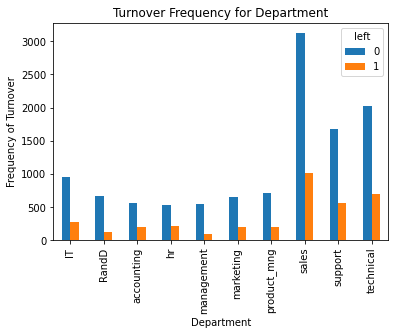

In [67]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

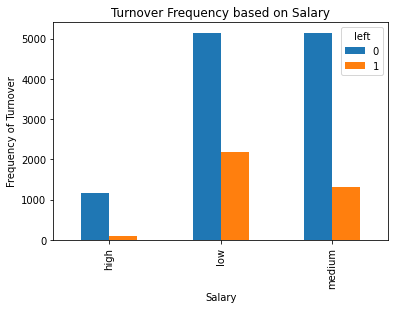

In [68]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title('Turnover Frequency based on Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()